# Credit Card Fraud Detection Dataset - Sofia Parada-Fernandez 

This dataset contains credit card transactions from European cardholders in September 2013. It has 284,807 transactions with 31 features, most anonymized (`V1` to `V28`), along with `Time` and `Amount`.

The `Class` column indicates whether a transaction is fraudulent (`1`) or legitimate (`0`). Fraud cases make up a very small portion of the data (about 0.17%), which makes detection challenging.

 ---

In this cell, we load the data and display its size and a sample of the transactions.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("creditcard.csv")

print("shape of dataset:", df.shape)

df.head()


shape of dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Class Distribution

Let’s look at how many transactions are legitimate vs. fraudulent. This helps us understand the imbalance in the dataset, which is important when building and evaluating models.


In [7]:
class_counts = df['Class'].value_counts()
print("Transaction counts by class:")
print(class_counts)

fraud_percent = df['Class'].value_counts(normalize=True)[1] * 100
print(f"\nPercentage of fraudulent transactions: {fraud_percent:.4f}%")


Transaction counts by class:
Class
0    284315
1       492
Name: count, dtype: int64

Percentage of fraudulent transactions: 0.1727%


## Visualizing Transaction Types

Here’s a bar chart showing the number of fraudulent versus non-fraudulent transactions. It highlights the class imbalance visually.


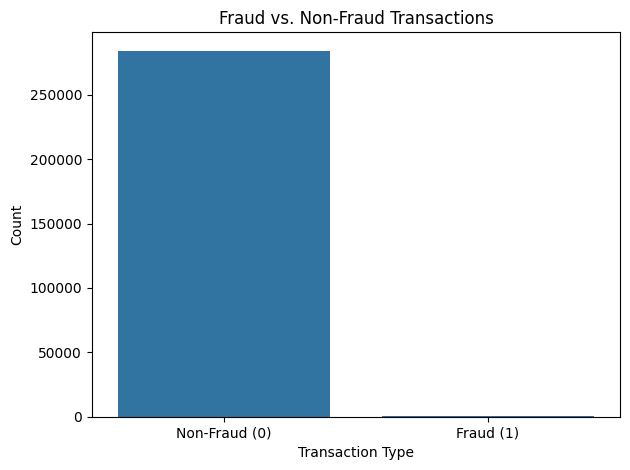

In [8]:
sns.countplot(data=df, x='Class')
plt.title("Fraud vs. Non-Fraud Transactions")
plt.xticks([0,1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Transaction Amount Distribution

This histogram compares the distribution of transaction amounts for fraudulent and non-fraudulent transactions.

Note how fraud transactions tend to cluster at lower amounts but can vary widely.


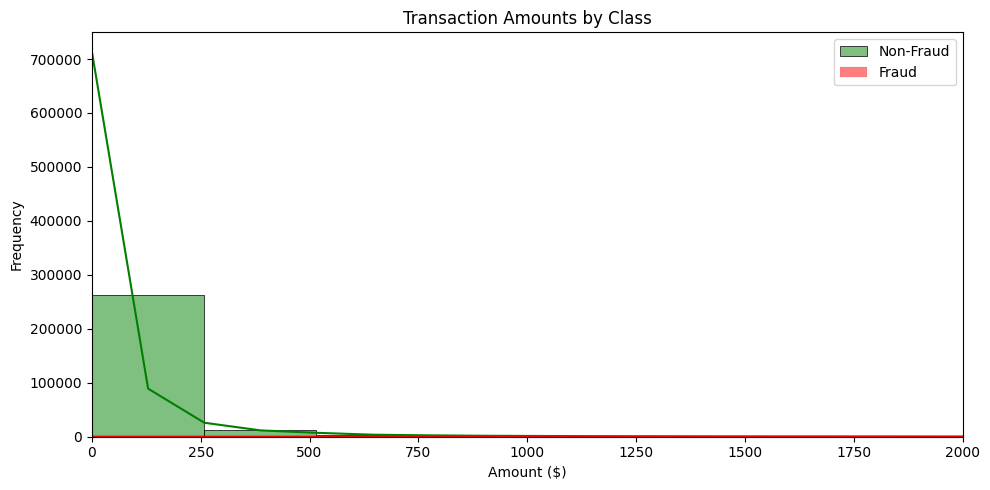

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=100, color='green', label='Non-Fraud', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=100, color='red', label='Fraud', kde=True)
plt.legend()
plt.title("Transaction Amounts by Class")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.xlim(0, 2000) 
plt.tight_layout()
plt.show()

## Feature Correlation with Fraud Class

This heatmap shows how each feature correlates with the target variable (`Class`).

Positive values mean a feature increases likelihood of fraud, negative means the opposite.

Understanding these correlations helps in feature selection and model interpretation.


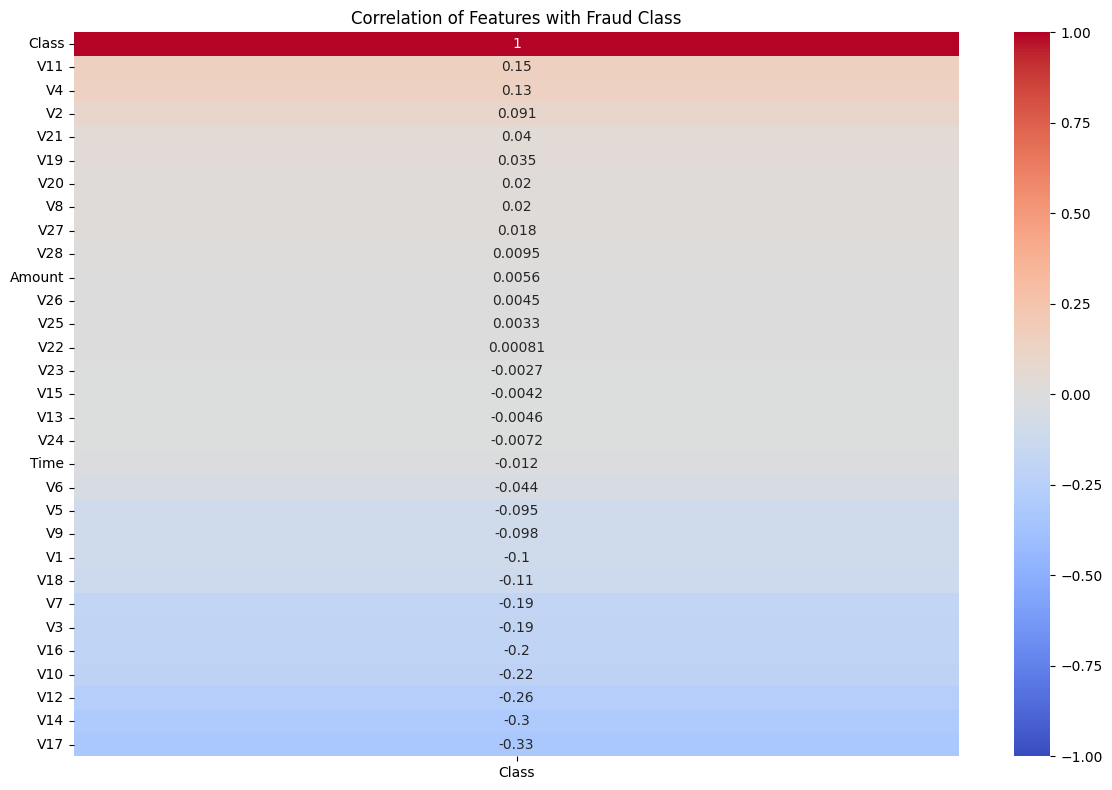

In [10]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(
    corr[['Class']].sort_values(by='Class', ascending=False),
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    annot_kws={"size":10}
)
plt.title("Correlation of Features with Fraud Class")
plt.tight_layout()
plt.show()


## Preparing the Data for Modeling

- We remove the `Time` and `Class` columns from features (`X`) since `Time` is not useful here and `Class` is the target.  
- Features are scaled using `StandardScaler` to normalize them, which helps many machine learning algorithms perform better.  
- We split the data into training (70%) and testing (30%) sets, stratifying by class to maintain the fraud ratio in both sets.


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 199364
Testing samples: 85443


## Training and Evaluating the Logistic Regression Model

Logistic Regression is a popular, interpretable classification algorithm. Here, it’s used to predict fraudulent transactions.

We evaluate the model using:

- **Classification Report**: Precision, recall, F1-score for each class.  
- **ROC AUC Score**: Measures the model’s ability to distinguish between classes — closer to 1 is better.
    

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.61      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score: 0.9555491038256734


## Confusion Matrix Visualization

A confusion matrix shows how many transactions were correctly or incorrectly classified as fraud or non-fraud.

- **True Positives (top-left)**: Correctly identified frauds  
- **False Positives (top-right)**: Legitimate transactions incorrectly flagged  
- **False Negatives (bottom-left)**: Fraud transactions missed by the model  
- **True Negatives (bottom-right)**: Correctly identified legitimate transactions


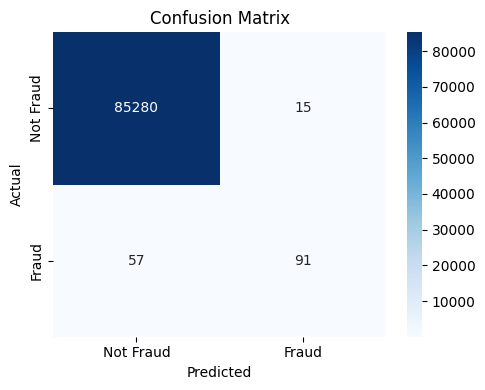

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Not Fraud', 'Fraud'],
    yticklabels=['Not Fraud', 'Fraud']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()



In [14]:
import joblib

joblib.dump(model, 'fraud_model.pkl');

In [15]:
%%capture
%pip install ipywidgets

## Upload Your CSV File

Use the file upload widget below to upload a CSV file for fraud detection analysis.


In [1]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
import io

upload = widgets.FileUpload(accept='.csv', multiple=False)
output = widgets.Output()

def handle_upload(change):
    output.clear_output()
    with output:
        try:
            uploaded_file = next(iter(upload.value.values()))
            content = uploaded_file['content']
            df = pd.read_csv(io.BytesIO(content))
            print("File uploaded successfully!")
            print(df.head())  # Show first few rows of the DataFrame
        except Exception as e:
            print("Error reading the file:", e)

upload.observe(handle_upload, names='value')

display(widgets.VBox([upload, output]))


## Processing Uploaded File

When you upload a CSV file, this function:

- Reads the file into a DataFrame  
- Prepares the data using the same scaler as before  
- Predicts fraud using the trained model  
- Displays the first 10 rows with a new `Prediction` column


In [17]:
import io

def on_upload_change(change):
   
    if upload.value:
        content = next(iter(upload.value.values()))['content']
        df_upload = pd.read_csv(io.BytesIO(content))
        
        X_upload = df_upload.drop(['Time', 'Class'], axis=1, errors='ignore')
        X_upload_scaled = scaler.transform(X_upload)  # Use the scaler you fit earlier
        
        preds = model.predict(X_upload_scaled)
        df_upload['Prediction'] = preds
        
        display(df_upload.head(10))  
        
upload.observe(on_upload_change, names='value')


# Thanks!

I  appreciate you checking out my fraud detection project. :)

It’s a quick look at how machine learning can spot sketchy credit card transactions and help keep things safe.

